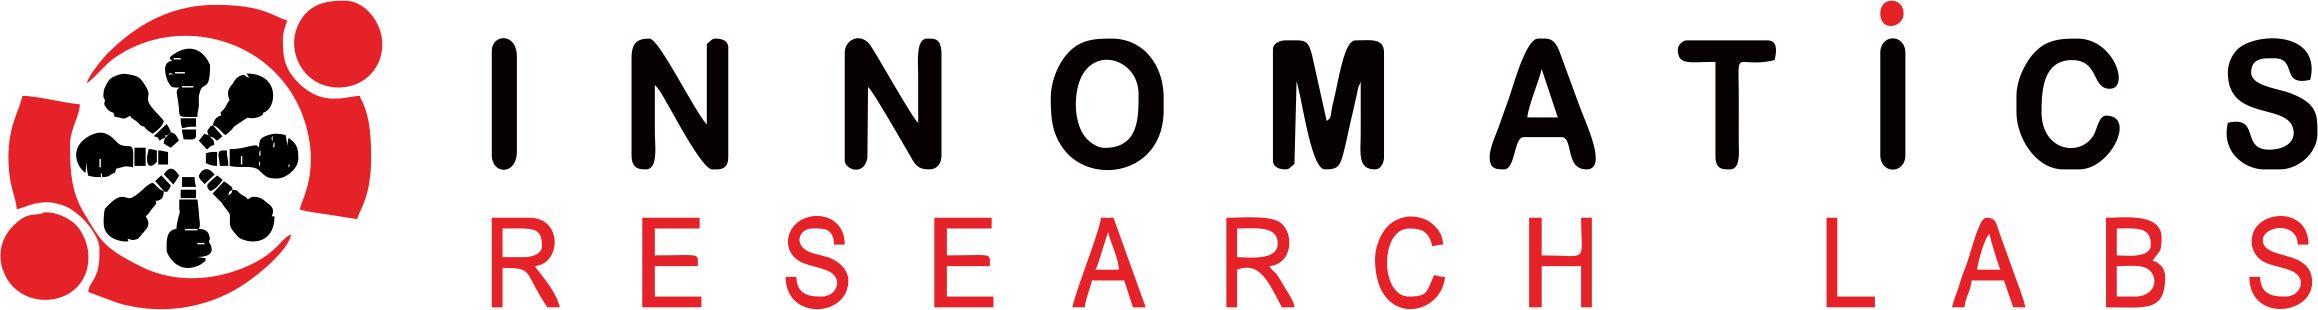

# Real Time Color Detection Application On Computer Vision

# Problem Statement:
In Industries like e-commerce, graphic design, and digital marketing, accurate and intuitive color recognition is essential for creating visually appealing products and content. Customers, designers, and businesses often struggle to find complementary and contrasting colors that enhance visual aesthetics. This project aims to provide an interactive solution that allows users to upload images, detect colors, and instantly view related shades and contrast colors, making it easier to make informed design decisions.

In [ ]:
# Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Dataset Reading

In [12]:
df = pd.read_csv(r"C:\Users\anuga\Downloads\python-project-color-detection\colors.csv")

In [20]:
dff=df.copy()

In [ ]:
# Learned Dataset

In [21]:
dff

,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
...,...,...,...,...,...,...
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168


# Data Cleaning:

# Checking for:

1. Missing values
2. Duplicate values
3. Outliers

In [22]:
# Re-arranging the column names properly

dff.columns = ["color","color_name","color_code","red","green","blue"]

In [23]:
dff

,color,color_name,color_code,red,green,blue
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
...,...,...,...,...,...,...
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168


In [42]:
dff.shape

(864, 6)

In [43]:
dff.head()

,color,color_name,color_code,red,green,blue
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54


In [44]:
dff.tail()

,color,color_name,color_code,red,green,blue
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168
863,zinnwaldite_brown,Zinnwaldite Brown,#2c1608,44,22,8


In [25]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       864 non-null    object
 1   color_name  864 non-null    object
 2   color_code  864 non-null    object
 3   red         864 non-null    int64 
 4   green       864 non-null    int64 
 5   blue        864 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.6+ KB


In [27]:
dff.isnull().sum()

color         0
color_name    0
color_code    0
red           0
green         0
blue          0
dtype: int64

In [29]:
dff.duplicated().sum()

0

In [96]:
unique_values = dff['color'].unique()
(unique_values)

array(['air_force_blue_usaf', 'air_superiority_blue', 'alabama_crimson',
       'alice_blue', 'alizarin_crimson', 'alloy_orange', 'almond',
       'amaranth', 'amber', 'amber_sae_ece', 'american_rose', 'amethyst',
       'android_green', 'anti_flash_white', 'antique_brass',
       'antique_fuchsia', 'antique_ruby', 'antique_white', 'ao_english',
       'apple_green', 'apricot', 'aqua', 'aquamarine', 'army_green',
       'arsenic', 'arylide_yellow', 'ash_grey', 'asparagus',
       'atomic_tangerine', 'auburn', 'aureolin', 'aurometalsaurus',
       'avocado', 'azure', 'azure_mist_web', 'baby_blue',
       'baby_blue_eyes', 'baby_pink', 'ball_blue', 'banana_mania',
       'banana_yellow', 'barn_red', 'battleship_grey', 'bazaar',
       'beau_blue', 'beaver', 'beige', 'big_dip_o_ruby', 'bisque',
       'bistre', 'bittersweet', 'bittersweet_shimmer', 'black',
       'black_bean', 'black_leather_jacket', 'black_olive',
       'blanched_almond', 'blast_off_bronze', 'bleu_de_france',
       'b

In [82]:
unique_values = dff['color_name'].unique()
(unique_values)

array(['Air Force Blue (Usaf)', 'Air Superiority Blue', 'Alabama Crimson',
       'Alice Blue', 'Alizarin Crimson', 'Alloy Orange', 'Almond',
       'Amaranth', 'Amber', 'Amber (Sae/Ece)', 'American Rose',
       'Amethyst', 'Android Green', 'Anti-Flash White', 'Antique Brass',
       'Antique Fuchsia', 'Antique Ruby', 'Antique White', 'Ao (English)',
       'Apple Green', 'Apricot', 'Aqua', 'Aquamarine', 'Army Green',
       'Arsenic', 'Arylide Yellow', 'Ash Grey', 'Asparagus',
       'Atomic Tangerine', 'Auburn', 'Aureolin', 'Aurometalsaurus',
       'Avocado', 'Azure', 'Azure Mist/Web', 'Baby Blue',
       'Baby Blue Eyes', 'Baby Pink', 'Ball Blue', 'Banana Mania',
       'Banana Yellow', 'Barn Red', 'Battleship Grey', 'Bazaar',
       'Beau Blue', 'Beaver', 'Beige', 'Big Dip O’Ruby', 'Bisque',
       'Bistre', 'Bittersweet', 'Bittersweet Shimmer', 'Black',
       'Black Bean', 'Black Leather Jacket', 'Black Olive',
       'Blanched Almond', 'Blast-Off Bronze', 'Bleu De France',
   

In [80]:
unique_values = dff['color_code'].unique()
(unique_values)

array([nan])

In [79]:
unique_values = dff['red'].unique()
(unique_values)

array([-1.85999572, -0.52368048,  0.05070064,  0.95329953,  0.80091271,
        0.43752874,  0.94157747,  0.82435683,  1.12913049, -0.06652   ,
        0.0624227 ,  0.97674366,  0.54302731, -0.16029651, -0.31268333,
        1.07052017, -0.20718476,  1.08224223, -0.37129365, -0.98084095,
       -1.16839397,  0.87124509,  0.22653159, -0.27751714,  0.07414477,
        1.10568636, -0.57056873, -0.85189826, -0.25407301,  0.02725651,
        1.00018779, -1.47316762, -0.40645984, -0.07824206,  0.34375223,
        0.00381238,  1.01190985, -0.03135381, -1.14494984,  1.11740842,
        0.37891842, -1.42627937, -1.28561461,  0.15619921,  0.03897857,
       -1.49661175, -0.66434524, -1.70760889, -1.26217048, -1.83655159,
       -1.64899858, -0.24235095,  0.74230239, -0.44162603,  0.53130524,
        0.26169778,  0.51958318, -1.52005588,  0.42580667, -1.76621921,
        0.58991556, -0.10168619,  0.84780096, -1.01600714, -0.35957159,
        0.35547429, -0.5471246 , -0.88706445, -0.74639968,  0.91

In [83]:
unique_values = dff['green'].unique()
(unique_values)

array([-1.00523079,  0.46325811, -1.13634586,  1.61707081, -0.34965539,
        1.2761716 , -1.07078833,  0.86971485,  0.01746684, -1.59524864,
       -0.29720936,  0.96149541,  1.55151327,  0.31903152, -0.42832444,
       -1.28057245,  1.4466212 ,  0.04368985,  0.75171128,  1.06638747,
        1.70885136, -0.54632801, -0.74300063,  1.17127954,  0.85660334,
        0.58126168,  0.37147755, -1.08389983,  1.48595573,  0.03057834,
        0.06991287,  1.07949898,  1.01394144,  0.90904938,  0.60748469,
        1.39417517,  1.31550612, -1.50346809,  0.09613588, -0.07431372,
        1.14505652,  0.05680136,  1.57773628, -1.14945737,  1.35484065,
       -0.17920578, -0.59877404, -1.63458317, -1.47724507, -0.93967325,
       -0.84789269, -0.15298277,  0.20102795,  1.36795215,  1.51217874,
        0.48948112, -0.10053674,  0.35836604,  0.2928085 ,  0.13547041,
       -0.96589626, -0.7036661 , -0.3627669 , -0.41521293,  1.22372557,
       -0.24476332, -0.97900777, -0.16609428,  0.54192715, -0.78

In [84]:
unique_values = dff['blue'].unique()
(unique_values)

array([ 3.06012034e-01,  9.44368297e-01, -8.04727865e-01,  1.73593006e+00,
       -8.30262115e-01, -1.31541288e+00,  1.09757380e+00, -4.98316858e-01,
       -1.51968688e+00, -7.28125113e-01,  1.08480668e+00, -7.91960740e-01,
        1.59549169e+00, -2.59332232e-02,  1.52806531e-01, -9.45166243e-01,
        1.22524505e+00,  7.40094293e-01,  1.18694368e+00, -1.11113887e+00,
       -5.62152485e-01, -1.53604476e-01,  7.91162794e-01, -2.17440102e-01,
       -9.83467619e-01,  1.14505155e-01, -1.48138550e+00,  1.54442319e+00,
        1.55719031e+00,  9.57135423e-01, -8.43029241e-01, -1.49415263e+00,
        1.40039405e-01,  5.06695284e-02,  1.41675193e+00, -8.97688496e-02,
        1.28908068e+00, -6.77056612e-01,  9.82669673e-01, -1.12390600e+00,
       -3.19577104e-01, -4.85549733e-01, -9.96234744e-01, -2.42974353e-01,
        1.42951906e+00,  1.51888893e+00,  9.06066922e-01,  1.13587518e+00,
        1.72316294e+00,  8.54998421e-01,  7.14560043e-01,  8.93299796e-01,
        4.33683287e-01,  

In [91]:
dff.nunique()

color         864
color_name    864
color_code      0
red           221
green         234
blue          230
cluster         5
dtype: int64

In [85]:
dff.value_counts(['color'])

color              
air_force_blue_usaf    1
pale_taupe             1
pale_gold              1
pale_goldenrod         1
pale_green             1
                      ..
english_lavender       1
eton_blue              1
fallow                 1
falu_red               1
zinnwaldite_brown      1
Name: count, Length: 864, dtype: int64

In [86]:
dff.value_counts(['color_name'])

color_name           
Air Force Blue (Usaf)    1
Pale Taupe               1
Pale Gold                1
Pale Goldenrod           1
Pale Green               1
                        ..
English Lavender         1
Eton Blue                1
Fallow                   1
Falu Red                 1
Zinnwaldite Brown        1
Name: count, Length: 864, dtype: int64

In [39]:
dff.describe()

,red,green,blue
count,864.000000,864.000000,864.000000
mean,158.674769,124.667824,119.031250
std,85.358623,76.313053,78.371535
min,0.000000,0.000000,0.000000
25%,101.000000,64.000000,53.000000
50%,178.000000,123.000000,118.500000
75%,236.250000,190.000000,186.000000
max,255.000000,255.000000,255.000000


In [45]:
dff.columns

Index(['color', 'color_name', 'color_code', 'red', 'green', 'blue'], dtype='object')

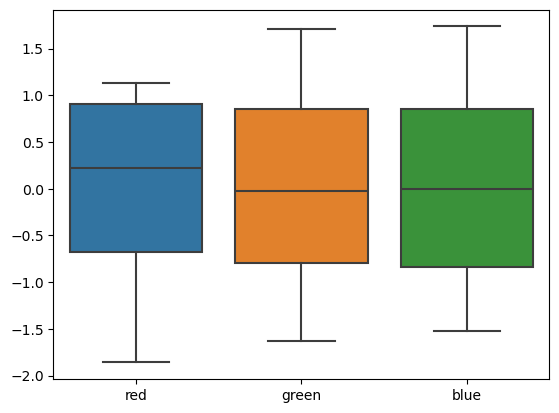

In [97]:
numeric_columns = ['red', 'green', 'blue']
sns.boxplot(data=dff[numeric_columns])
plt.show()

# Complete Code With Color_Shades and Contrast_Colors

In [98]:
import cv2
import numpy as np
import pandas as pd
import colorsys

# Load image and resize it
img_path = r'C:\Users\anuga\OneDrive\Desktop\irfan.jpg'
img = cv2.imread(img_path)
print(img)

print(img.shape)
# Resize the image to desired dimensions (e.g., 800x600)
img_resized = cv2.resize(img, (600, 800))

# Function to convert RGB to HLS (Hue, Lightness, Saturation)
def rgb_to_hls(r, g, b):
    return colorsys.rgb_to_hls(r/255.0, g/255.0, b/255.0)

# Function to convert HLS back to RGB
def hls_to_rgb(h, l, s):
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return [int(r*255), int(g*255), int(b*255)]

# Function to create complementary, triadic, and analogous colors
def create_contrast_colors(base_color):
    r, g, b = base_color
    h, l, s = rgb_to_hls(r, g, b)
    complementary_color = hls_to_rgb((h + 0.5) % 1.0, l, s)
    triadic_color1 = hls_to_rgb((h + 1/3) % 1.0, l, s)
    triadic_color2 = hls_to_rgb((h + 2/3) % 1.0, l, s)
    analogous_color1 = hls_to_rgb((h + 1/12) % 1.0, l, s)
    analogous_color2 = hls_to_rgb((h - 1/12) % 1.0, l, s)
    return [complementary_color, triadic_color1, triadic_color2, analogous_color1, analogous_color2]

# Function to create shades of the clicked color
def create_shades(base_color, num_shades=5):
    shades = []
    step = 20  # Difference between each shade
    for i in range(num_shades):
        new_shade = [max(0, min(c - i * step, 255)) for c in base_color]  # Adjust color
        shades.append(new_shade)
    return shades

# Function to display shades with a label above
def display_shades(img_display, shades, start_x=20, start_y=80):
    # Add the label "Color Shades" with a smaller font size
    cv2.putText(img_display, "Color Shades", (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
    for i, shade in enumerate(shades):
        shade_color = tuple(map(int, shade))  # Convert to int
        cv2.rectangle(img_display, (start_x, start_y + i * 50), (start_x + 100, start_y + i * 50 + 50), shade_color, -1)

# Function to display multiple contrast colors below the shades
def display_contrast_colors(img_display, contrast_colors, start_x=20, start_y=350):
    for i, contrast_color in enumerate(contrast_colors):
        contrast_color = tuple(map(int, contrast_color))  # Convert to int
        cv2.rectangle(img_display, (start_x, start_y + i * 50), (start_x + 100, start_y + i * 50 + 50), contrast_color, -1)
        cv2.putText(img_display, f"Contrast {i+1}", (start_x + 110, start_y + i * 50 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

# Reading the CSV for color names
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(r"C:\Users\anuga\Downloads\python-project-color-detection\colors.csv", names=index, header=None)

# Declaring global variables
clicked = False
r = g = b = xpos = ypos = 0

# Function to get color name from RGB values
def getColorName(R, G, B):
    minimum = 10000
    cname = ""
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

# Function to get x, y coordinates of mouse double-click
def draw_function(event, x, y, flags, param):
    global b, g, r, xpos, ypos, clicked
    if event == cv2.EVENT_LBUTTONDBLCLK:
        clicked = True
        xpos = x
        ypos = y
        b, g, r = img_resized[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

# Main interactive color detection function
def interactive_color_detection(img):
    global clicked, r, g, b
    current_color = None
    
    while True:
        img_display = img.copy()  # Copy the original image to draw on
        
        if clicked:
            # Update the color information
            current_color = (b, g, r)
            clicked = False
        
        if current_color:
            # Draw rectangle and text on the image in the middle
            b, g, r = current_color
            text = getColorName(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
            text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
            text_x = (img_display.shape[1] - text_size[0]) // 2  # Center horizontally
            text_y = 60  # Slightly lower than top
            
            cv2.rectangle(img_display, (text_x - 10, text_y - 35), (text_x + text_size[0] + 10, text_y + 10), (b, g, r), -1)
            cv2.putText(img_display, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # For very light colors, display text in black
            if r + g + b >= 600:
                cv2.putText(img_display, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
            
            # Generate and display shades of the clicked color with the label
            shades = create_shades(current_color)
            display_shades(img_display, shades)

            # Generate and display multiple contrast colors
            contrast_colors = create_contrast_colors(current_color)
            display_contrast_colors(img_display, contrast_colors)

            # Draw a small box/circle at the clicked position
            cv2.rectangle(img_display, (xpos-10, ypos-10), (xpos+10, ypos+10), (b, g, r), -1)
            cv2.circle(img_display, (xpos, ypos), 5, (255, 255, 255), 2)  # Circle to mark the click point
        
        # Show updated image with drawn rectangle, text, and click mark
        cv2.imshow('image', img_display)
        
        # Wait for a key event and break the loop if `esc` is pressed
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC key
            break

# Initialize OpenCV mouse callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

# Start the interactive color detection with the resized image
interactive_color_detection(img_resized)
cv2.destroyAllWindows()

[[[164 167 165]
  [164 167 165]
  [163 166 164]
  ...
  [170 173 171]
  [170 173 171]
  [169 172 170]]

 [[164 167 165]
  [164 167 165]
  [163 166 164]
  ...
  [170 173 171]
  [170 173 171]
  [169 172 170]]

 [[163 166 164]
  [163 166 164]
  [163 166 164]
  ...
  [170 173 171]
  [170 173 171]
  [169 172 170]]

 ...

 [[195 199 193]
  [194 198 192]
  [194 198 192]
  ...
  [185 196 200]
  [185 196 200]
  [185 196 200]]

 [[195 199 193]
  [195 199 193]
  [195 199 193]
  ...
  [185 196 200]
  [185 196 200]
  [185 196 200]]

 [[196 200 194]
  [196 200 194]
  [195 199 193]
  ...
  [185 196 200]
  [185 196 200]
  [185 196 200]]]
(4032, 3024, 3)
